## Implementing simple Chatbot Using LangGraph

In [1]:
import os
from dotenv import load_dotenv

In [ ]:
load_dotenv()
os.environ['OPEN OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY') # type: ignore
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY') # type: ignore

In [8]:
from langchain_openai import ChatOpenAI
llm_chatgpt=ChatOpenAI(model="gpt-4o")
llm_chatgpt.invoke("I'm Diego and I like to play Resident Evil 4")

AIMessage(content="Hi Diego! Resident Evil 4 is a classic and has a huge fan base. Whether you're enjoying the original version or the newer remake, there are plenty of exciting moments and challenges. What's your favorite part or aspect of the game?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 18, 'total_tokens': 65, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CLeTtO4RS87Dd5quzXcIUZGJvhbfo', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3f1c452f-e112-49a6-b2db-35bfb571048b-0', usage_metadata={'input_tokens': 18, 'output_tokens': 47, 'total_tokens': 65, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'aud

In [9]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("I'm Diego and I like to play Resident Evil 4")

AIMessage(content="<think>\nOkay, the user mentioned they're Diego and like to play Resident Evil 4. I should respond with a friendly greeting and acknowledge their gaming interest. Since they’re a fan of the RE4 series, maybe suggest some related content or games. I can ask about their favorite characters or memorable moments in the game to keep the conversation going. Also, check if they want tips on gameplay or other RE titles.\n\nI should keep the tone casual and welcoming. Maybe mention some key elements of RE4 that fans love, like Leon's character or the game's atmosphere. Let them know I can help with game discussions, tips, or even other related topics. Make sure to invite them to ask questions or share their experiences. Avoid using any complicated jargon. Keep it simple and engaging.\n</think>\n\nHey Diego! 👋 Nice to meet you! Resident Evil 4 is an absolute classic—Leon's journey through Las Plagas is still one of the most iconic survival horror experiences out there. Whether

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from typing import Annotated
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [10]:
### Nodes

def super_bot(state: State) -> State:
    return { "messages": [llm_groq.invoke(state['messages'])] }

In [12]:
graph_buillder = StateGraph(State)

graph_buillder.add_node("super_bot", super_bot)

graph_buillder.add_edge(START, "super_bot")
graph_buillder.add_edge("super_bot", END)

graph = graph_buillder.compile()

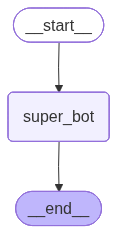

In [14]:
from IPython.display import Image,display
## Display
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
## Invoke Graph
graph.invoke({ "messages": ["My name is Diego and I love to play Resident Evil 4"] })

{'messages': [HumanMessage(content='My name is Diego and I love to play Resident Evil 4', additional_kwargs={}, response_metadata={}, id='6fe6b4e7-c45e-4788-a439-98141903e178'),
  AIMessage(content="<think>\nOkay, the user is Diego and he loves playing Resident Evil 4. I need to respond in a friendly and engaging way. First, I should acknowledge his name and his interest. Maybe start with a greeting that includes his name to make it personal. Next, since Resident Evil 4 is a classic game, I should mention its popularity and maybe highlight some aspects he might enjoy, like the gameplay or story. It's good to ask him a follow-up question to keep the conversation going, like which character is his favorite or if he prefers the original or remakes. Also, I can offer tips or discuss strategies if he's looking for help. Need to keep the tone positive and enthusiastic. Avoid any technical jargon, keep it casual. Make sure the response is not too long but covers the key points. Maybe add an e

In [17]:
## Streaming the responses
for event in graph.stream({ "messages": ["A mi me gusta Trix de Nestle"] }, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='A mi me gusta Trix de Nestle', additional_kwargs={}, response_metadata={}, id='dd3bf116-de6b-4352-abc7-9f0bcff5944b')]}
{'messages': [HumanMessage(content='A mi me gusta Trix de Nestle', additional_kwargs={}, response_metadata={}, id='dd3bf116-de6b-4352-abc7-9f0bcff5944b'), AIMessage(content="<think>\nOkay, the user mentioned they like Trix cereal from Nestlé. I need to respond appropriately. First, I should acknowledge their preference. Trix is a colorful and sweet cereal, so maybe highlight that. It's important to note that it's a popular choice among kids, but also mention the sugar content for health awareness. I should ask if they want more info or tips on enjoying it, like pairing with milk or creative recipes. Keep the tone friendly and supportive. Let me check if there are any recent updates about Trix, but I don't think so. Also, maybe suggest alternatives if they're looking for healthier options. Make sure the response is concise but covers

In [18]:
## Streaming the responses
for event in graph.stream({ "messages": ["A mi me gusta Trix de Nestle"] }, stream_mode="updates"):
    print(event)

{'super_bot': {'messages': [AIMessage(content='<think>\nOkay, the user mentioned that they like Trix cereal from Nestlé. Let me start by acknowledging their preference. I should respond in a friendly and positive way to keep the conversation engaging.\n\nFirst, I should thank them for sharing their preference. Then, maybe add some information about the cereal to show I\'m knowledgeable. I remember that Trix is a colorful cereal with different shapes and is part of the Nestlé brand. It\'s also been around for a while, so mentioning its history could be interesting.\n\nI should check if there are any recent updates about Trix that I can include. For example, any new flavors or changes in the product. Also, maybe talk about the target audience—Trix is often marketed towards kids because of its fun colors and shapes. It\'s important to note if it\'s gluten-free or has any other dietary considerations, which I think it is gluten-free, but I need to confirm that.\n\nAnother point could be th